# SVM

# Introduction

Support Vector Machine is a supervised Machine Learning algorithm widely used for solving different machine learning problems. Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.

## Understanding the Mathematics involved
Let’s take the example of the following dataset and see how can we divide the data into appropriate groups.
<img src='SVM_intution.PNG'  width="300">

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown 
<img src='SVM_hyperplane.PNG' width="400">


The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM. 
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. 
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.
<img src= "SVM_3D_Hyperplane.PNG" width="300">
                                                                        Image: bogotobogo.com 


In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that’s what a kernel function does without computing the additional coordinates for the higher dimension.


## Python  Implementation

In [ ]:
#Import necessory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get the CSV data here and print head
df = pd.read_csv('breast cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#print summary
print ('Shape        ------>', df.shape)
print ('Each Column and data type and its count','\n')
print ( df.info())

Shape        ------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  

In [5]:
#DROP ALERT 1 : Unnamed:32 column has all nulls. Safe to remove the column.
df = df.drop(['Unnamed: 32'],axis=1)

In [6]:
df.shape

(569, 31)

In [7]:
# Dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Seems no other cols have nulls. It's safe to proceed.

`As we can see each feature data scaled differently. Let's go ahead and scale the data`

In [8]:
scaler = StandardScaler()
X = df.drop('diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis (PCA) 

In [9]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

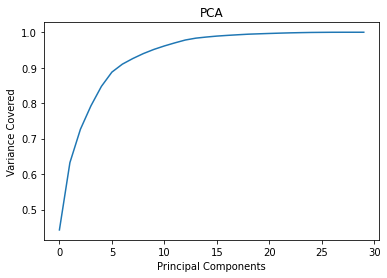

In [10]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Around 13 Principal Components are able to explain > 95 % variance. Its safe to consider starting 13 PC's

In [11]:
pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC7,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157118,-0.877402,0.262955,-0.859017,0.103395
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157921,-0.943527
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024065,0.454276,-0.605604,0.124390,-0.410633
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405440,-1.116975,-1.151513,1.011317,-0.933277
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110516,0.387949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123345,-0.051729
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113359,-0.105207,-0.108632,0.244804,0.222753,-0.192639
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542035,-0.089296,-0.178628,-0.697456,1.225193


In [12]:
#Replace Label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [13]:
y = df['diagnosis']

In [14]:
from sklearn.svm import SVC

In [15]:
# Buidling model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25, random_state= 355)

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [16]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# C      = It is a hypermeter in SVM to control error. How much error we can allow.
#          low C means low error and if we have large C means large error. 
# gamma = Gamma decides that how much curvature we want in a decision boundary.Gamma high means more curvature.
#         Gamma low means less curvature.

param_grid = { 'C' : [0.001,2,3,4,5,6,7,10],
               'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,1]               
              }

In [20]:
gridsearch = GridSearchCV(svc, param_grid)

In [21]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1]})

In [22]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'C': 7, 'gamma': 0.1}

In [33]:
svc = SVC (C = 7, gamma =0.1)

In [29]:
svc.fit(x_train,y_train)

SVC(C=7, gamma=0.05)

In [30]:
y_pred = svc.predict(x_test)

In [31]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[93,  0],
       [ 5, 45]], dtype=int64)

In [32]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        93
           1       1.00      0.90      0.95        50

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



# Creating Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('breast cancer.csv',index_col=0)

In [36]:
X = df.drop(['Unnamed: 32','diagnosis'], axis=1)

y = df.diagnosis

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 355)


In [37]:
pipe = Pipeline([('Scaler', StandardScaler()),   # fit_transform
                 ('PCA',PCA(n_components=13)),   # fit_transform
                 ('SVM', SVC(C=7, gamma=0.1))])  # ONLY fit 

#                 ('Simple Imputer', SimpleImputer(strategy='mean')), # fit_transform
#                 ('Ohe', OneHotEncoder(handle_unknown='ignore')),    # fit_transform

In [38]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.1))])

In [39]:
y_pred = pipe.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.965034965034965